In [ ]:
# for quantify the substrate

In [1]:
%cd ~/REVIVAL2
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

/disk2/fli/REVIVAL2


In [6]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator, DataStructs

from REVIVAL.global_param import LIB_INFO_DICT

In [8]:

# List of SMILES strings
smiles_list = [
    "C12=C(C=CN2)C=CC=C1",  # indoel
] + [v["substrate-smiles"] for v in LIB_INFO_DICT.values()]

name_list = ["indoel"] + [v["substrate"] for v in LIB_INFO_DICT.values()]

# Convert SMILES strings to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Use the new MorganGenerator to create a fingerprint generator
morgan_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2)

# Generate fingerprints using the MorganGenerator
fingerprints = [morgan_generator.GetFingerprint(mol) for mol in molecules]


# Function to calculate Tanimoto similarity between two fingerprints
def calculate_tanimoto(fp1, fp2):
    return DataStructs.FingerprintSimilarity(fp1, fp2)

# Calculate pairwise similarity
num_molecules = len(fingerprints)
similarity_matrix = [[0] * num_molecules for _ in range(num_molecules)]

for i in range(num_molecules):
    for j in range(i, num_molecules):
        similarity = calculate_tanimoto(fingerprints[i], fingerprints[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity  # Symmetric matrix


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

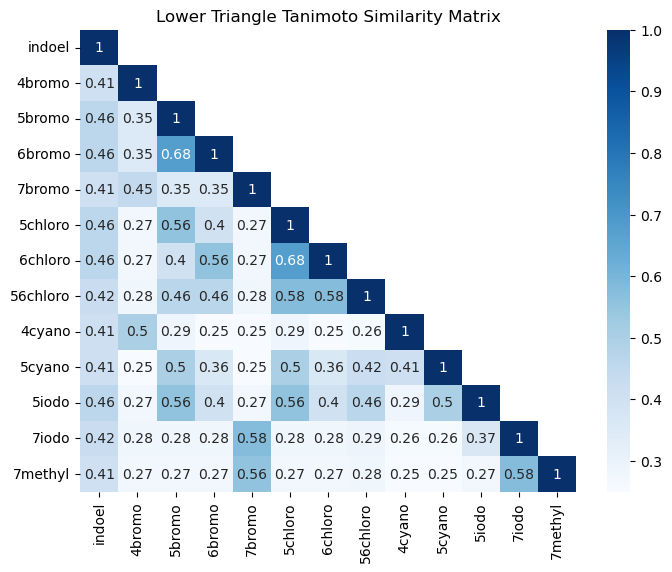

In [13]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(similarity_matrix, dtype=bool), k=1)

# Plot heatmap of the lower triangle (including diagonal)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, mask=mask, cmap='Blues', xticklabels=name_list, yticklabels=name_list)
plt.title("Lower Triangle Tanimoto Similarity Matrix")
plt.show()